In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from scipy.ndimage.filters import gaussian_filter
tqdm.pandas()
import cmocean

c:\Users\Matt\.conda\envs\astronomy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

In [3]:
PATH_RAW = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'

In [4]:
hdu_l000 = fits.open(f'{PATH_RAW}l000_results/l000_diffcdens.fits')[0]
hdu_l358 = fits.open(f'{PATH_RAW}l358_results/l358_diffcdens.fits')[0]
hdu_l002 = fits.open(f'{PATH_RAW}l002_results/l002_diffcdens.fits')[0]
hdu_l358_copy = fits.open(f'{PATH_RAW}l358_results/l358_diffcdens.fits')[0]
hdu_l000_copy = fits.open(f'{PATH_RAW}l000_results/l000_diffcdens.fits')[0]
hdu_l002_copy = fits.open(f'{PATH_RAW}l002_results/l002_diffcdens.fits')[0]
hdu_l000

In [5]:
def reproject(indexes):
    l358_data = np.sum([hdu_l358.data[index] for index in indexes], axis=0)
    l000_data = np.sum([hdu_l000.data[index] for index in indexes], axis=0)
    l002_data = np.sum([hdu_l002.data[index] for index in indexes], axis=0)
    
    hdu_l358_copy.data = l358_data
    hdu_l000_copy.data = l000_data
    hdu_l002_copy.data = l002_data
    
    hdus = [hdu_l358_copy,hdu_l000_copy,hdu_l002_copy]
    
    wcs, shape = find_optimal_celestial_wcs(hdus,projection='CAR')
    array, footprint = reproject_and_coadd(hdus,
                                       wcs, shape_out=shape,
                                       reproject_function=reproject_interp)
    return (array,wcs)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.05s/it]


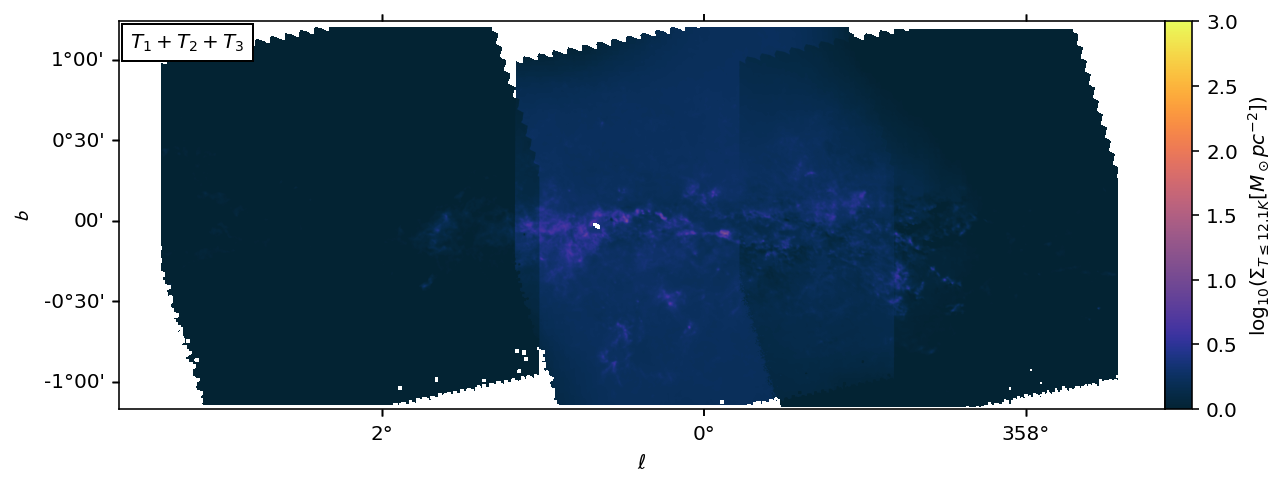

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.06s/it]
C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


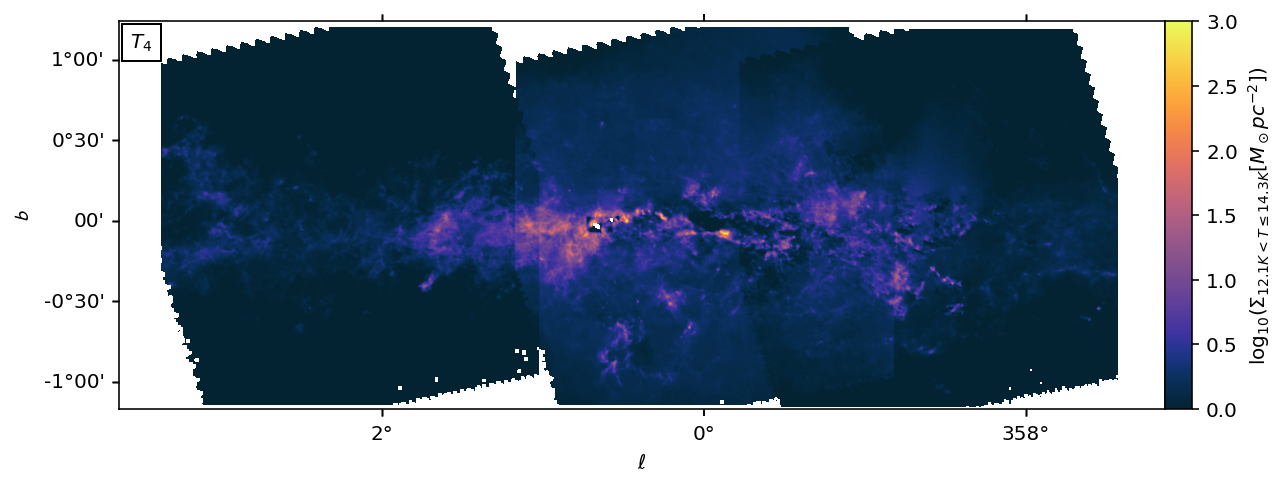

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.08s/it]
C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log10


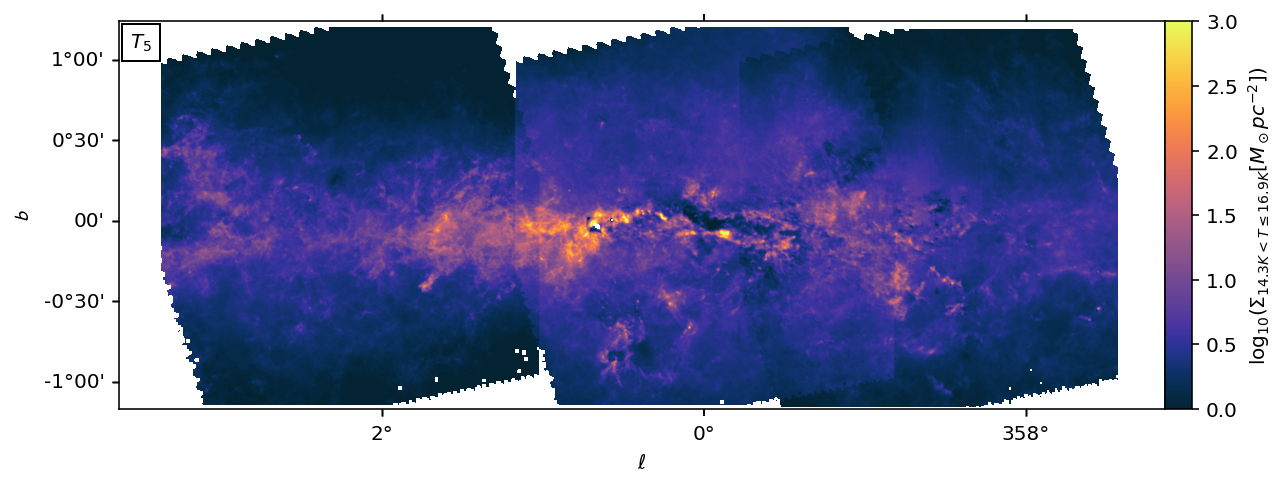

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.10s/it]


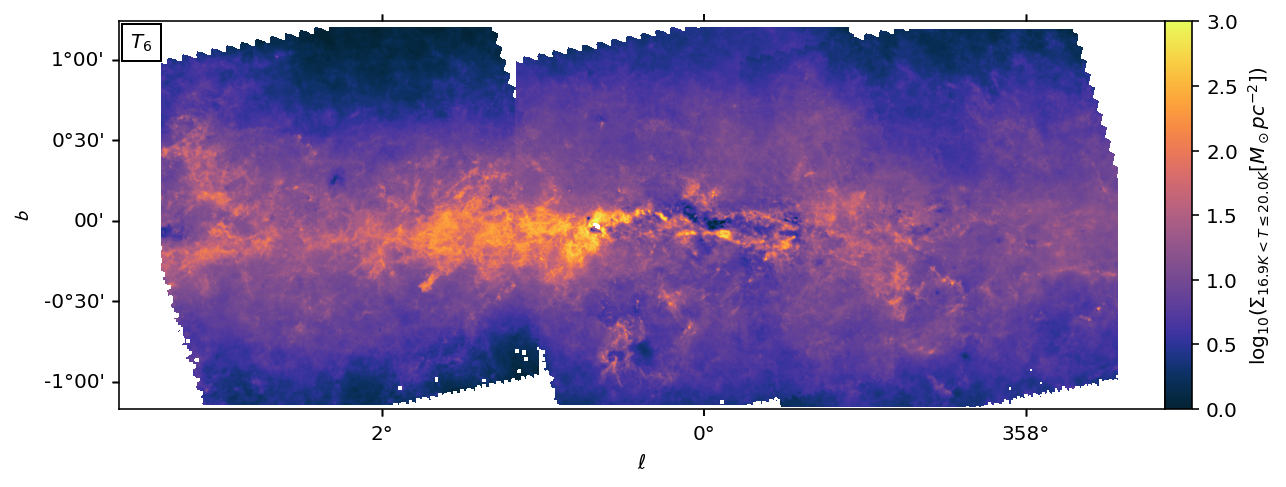

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.05s/it]


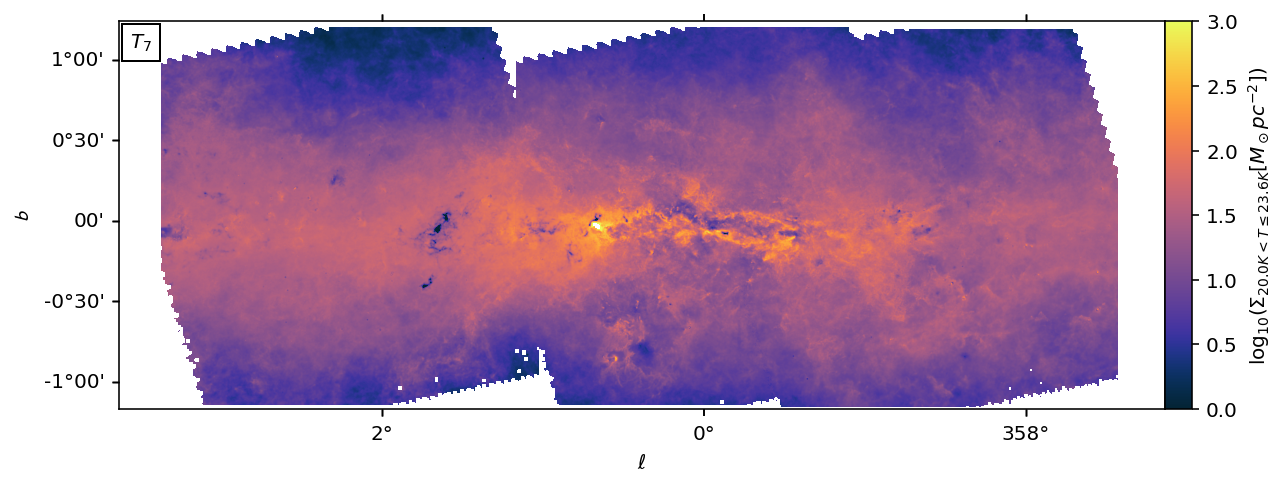

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.09s/it]
C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: divide by zero encountered in log10


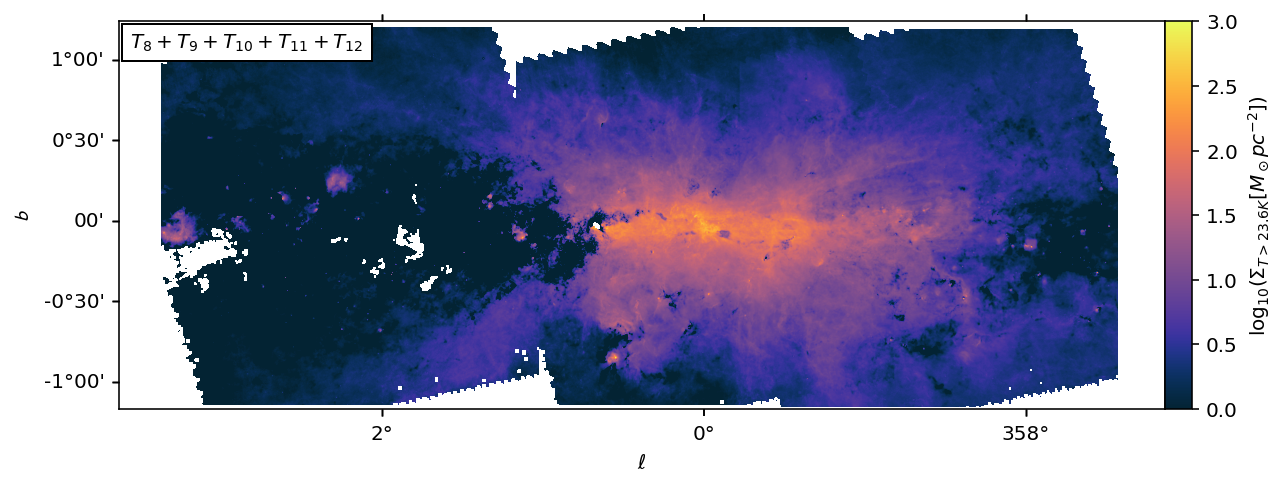

In [6]:
#T1+T2+T3

plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)#figsize=(10*2, 8*2))

array, wcs = reproject([0,1])

ax1 = plt.subplot(1,1, 1, projection=wcs)
plt.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\mathcal{b}$')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

cax = plt.axes([0.9, 0.143, 0.02, 0.718])
plt.colorbar(cax=cax, label=r'$\log_{10}(\Sigma_{T\leq 12.1K} [M_\odot pc^{-2}])$')
ax1.text(0.011, 0.93, r'$T_1+T_2+T_3$', transform=ax1.transAxes,bbox = dict(facecolor='white'))
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/T1-T2.png', bbox_inches="tight")
plt.show()

#T4

plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)#figsize=(10*2, 8*2))

array, wcs = reproject([3])

ax1 = plt.subplot(1,1, 1, projection=wcs)
plt.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\mathcal{b}$')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

cax = plt.axes([0.9, 0.143, 0.02, 0.718])
plt.colorbar(cax=cax, label=r'$\log_{10}(\Sigma_{12.1K<T\leq 14.3K} [M_\odot pc^{-2}])$')
ax1.text(0.011, 0.93, r'$T_4$', transform=ax1.transAxes,bbox = dict(facecolor='white'))
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/T4.png', bbox_inches="tight")
plt.show()

#T5adaadd

plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)#figsize=(10*2, 8*2))

array, wcs = reproject([4])

ax1 = plt.subplot(1,1, 1, projection=wcs)
plt.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\mathcal{b}$')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

cax = plt.axes([0.9, 0.143, 0.02, 0.718])
plt.colorbar(cax=cax, label=r'$\log_{10}(\Sigma_{14.3K<T\leq 16.9K} [M_\odot pc^{-2}])$')
ax1.text(0.011, 0.93, r'$T_5$', transform=ax1.transAxes,bbox = dict(facecolor='white'))
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/T5.png', bbox_inches="tight")
plt.show()

#T6

plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)#figsize=(10*2, 8*2))

array, wcs = reproject([5])

ax1 = plt.subplot(1,1, 1, projection=wcs)
plt.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\mathcal{b}$')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

cax = plt.axes([0.9, 0.143, 0.02, 0.718])
plt.colorbar(cax=cax, label=r'$\log_{10}(\Sigma_{16.9K<T\leq 20.0K} [M_\odot pc^{-2}])$')
ax1.text(0.011, 0.93, r'$T_6$', transform=ax1.transAxes,bbox = dict(facecolor='white'))
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/T6.png', bbox_inches="tight")
plt.show()

#T7

plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)#figsize=(10*2, 8*2))

array, wcs = reproject([6])

ax1 = plt.subplot(1,1, 1, projection=wcs)
plt.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\mathcal{b}$')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

cax = plt.axes([0.9, 0.143, 0.02, 0.718])
plt.colorbar(cax=cax, label=r'$\log_{10}(\Sigma_{20.0K<T\leq 23.6K} [M_\odot pc^{-2}])$')
ax1.text(0.011, 0.93, r'$T_7$', transform=ax1.transAxes,bbox = dict(facecolor='white'))
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/T7.png', bbox_inches="tight")
plt.show()

#T8+...+T12

plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)#figsize=(10*2, 8*2))

array, wcs = reproject([7,8,9,10,11])

ax1 = plt.subplot(1,1, 1, projection=wcs)
plt.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\mathcal{b}$')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

cax = plt.axes([0.9, 0.143, 0.02, 0.718])
plt.colorbar(cax=cax, label=r'$\log_{10}(\Sigma_{T> 23.6K} [M_\odot pc^{-2}])$')
ax1.text(0.011, 0.93, r'$T_8+T_9+T_{10}+T_{11}+T_{12}$', transform=ax1.transAxes,bbox = dict(facecolor='white'))
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/T8-T12.png', bbox_inches="tight")
plt.show()

In [6]:
reprojections = [[0,1,2],[3],[4],[5],[6],[7,8,9,10,11]]
repros = [reproject(rep) for rep in reprojections]
print(repros)

[(array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 0.20164836070501888  0.11482672575280367  
CRPIX : 1908.0861670789789  770.8429008716965  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.001667  0.001667  
NAXIS : 0  0), (array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 0.20164836070501888  0.11482672575280367  
CRPIX : 1908.0861670789789  770.8429008716965  
PC1_1 PC

C:\Users\Matt\AppData\Local\Temp\ipykernel_31252\1160142444.py:10: RuntimeWarning: divide by zero encountered in log10
  img = a.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)


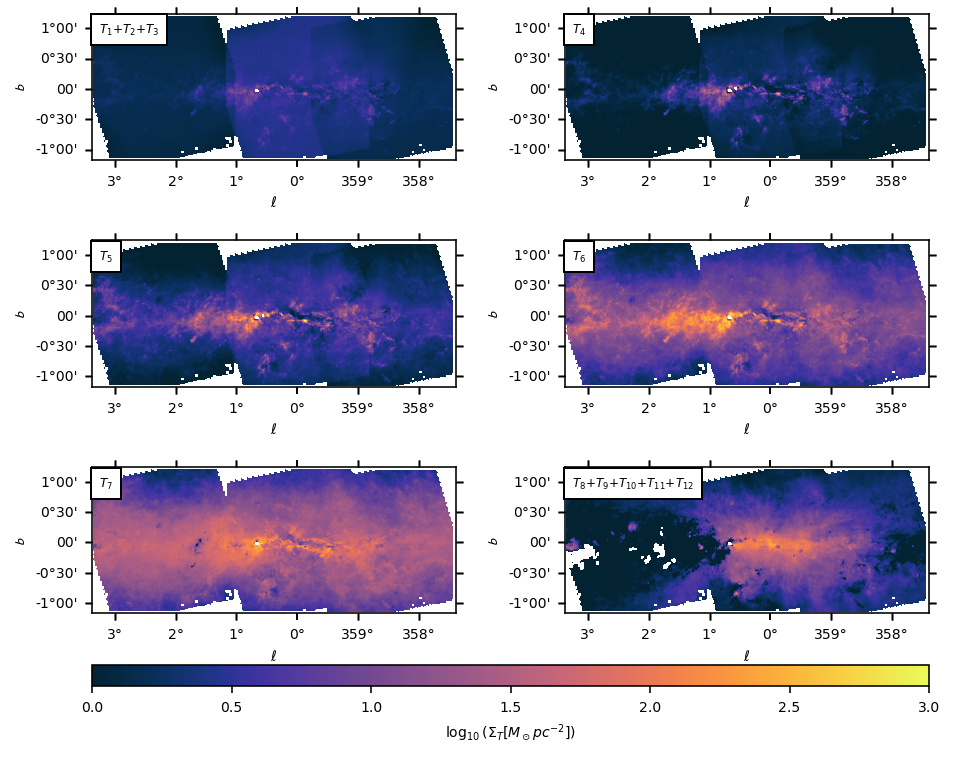

In [9]:
plt.rcParams.update({'font.size': 7})

fig = plt.figure(figsize=(1080/144, 1080/144), dpi=144)
array, wcs = repros[0]
ax = [fig.add_subplot(3,2,i+1, projection = wcs) for i in range(6)]

for i in range(6):
    array, wcs = repros[i]
    a = ax[i]
    img = a.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)
    substring = '+'.join([fr'$T_{{{str(no+1)}}}$' for no in reprojections[i]])
    a.text(70.85,1250,substring,bbox = dict(facecolor='white'), fontsize = 6)
    a.set_xlabel(r'$\ell$')
    a.set_ylabel(r'$\cal b$')
    
cbaxes = fig.add_axes([0.1252, 0.15, 0.775, 0.02]) 
cb = plt.colorbar(img,orientation="horizontal", cax = cbaxes, label=r'$\log_{10}(\Sigma_{T} [M_\odot pc^{-2}])$')
fig.subplots_adjust(wspace = 0.3, hspace=-0.4)
#plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/TempDiffs.png',bbox_inches="tight")
plt.show()

C:\Users\Matt\AppData\Local\Temp\ipykernel_31252\478040176.py:19: RuntimeWarning: divide by zero encountered in log10
  img = a.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)


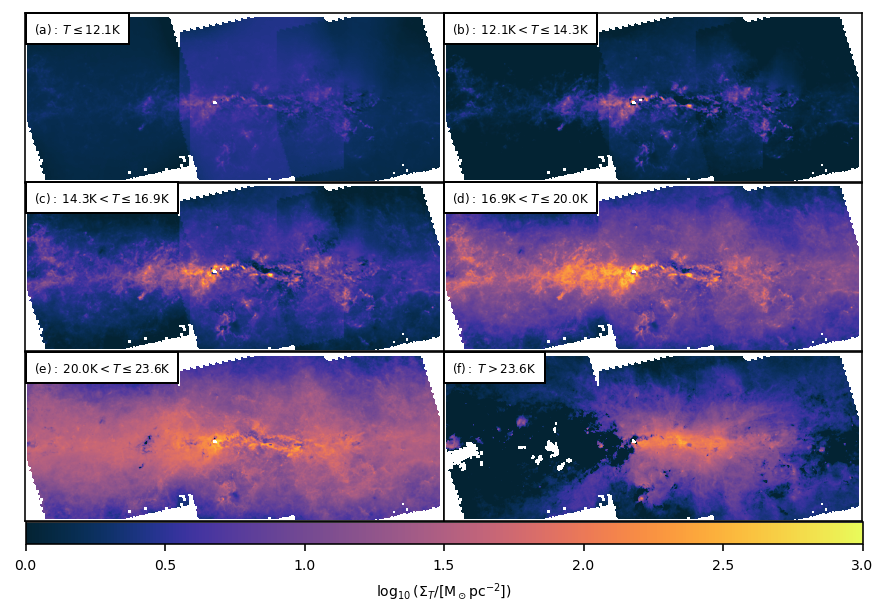

In [31]:
plt.rcParams.update({'font.size': 7})

fig = plt.figure(figsize=(1080/144, 1080/144), dpi=144)
array, wcs = repros[0]
ax = [fig.add_subplot(3,2,i+1) for i in range(6)]

labels = [
    r'$\mathrm{(a):\;} T\leq 12.1 \rm K$',
    r'$\mathrm{(b):\;} 12.1 \mathrm{K} < T \leq 14.3 \mathrm{K}$',
    r'$\mathrm{(c):\;} 14.3 \mathrm{K} < T \leq 16.9 \mathrm{K}$',
    r'$\mathrm{(d):\;} 16.9 \mathrm{K} < T \leq 20.0 \mathrm{K}$',
    r'$\mathrm{(e):\;} 20.0 \mathrm{K} < T \leq 23.6 \mathrm{K}$',
    r'$\mathrm{(f):\;} T > 23.6 \mathrm{K}$'
]

for i in range(6):
    array, wcs = repros[i]
    a = ax[i]
    img = a.imshow(np.log10(array/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=0, vmax=3)
    #substring = '+'.join([fr'$T_{{{str(no+1)}}}$' for no in reprojections[i]])
    a.text(70.85,1280,labels[i],bbox = dict(facecolor='white'), fontsize = 6)
    a.set_xticks([])
    a.set_yticks([])
    
cbaxes = fig.add_axes([0.1252, 0.2385, 0.775, 0.02]) 
cb = plt.colorbar(img,orientation="horizontal", cax = cbaxes, label=r'$\log_{10}(\Sigma_{T}/ [\rm{M}_\odot \rm{pc}^{-2}])$')
fig.subplots_adjust(wspace = 0, hspace=-0.656)
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/TempDiffsNolabels.png',bbox_inches="tight")
plt.show()